In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

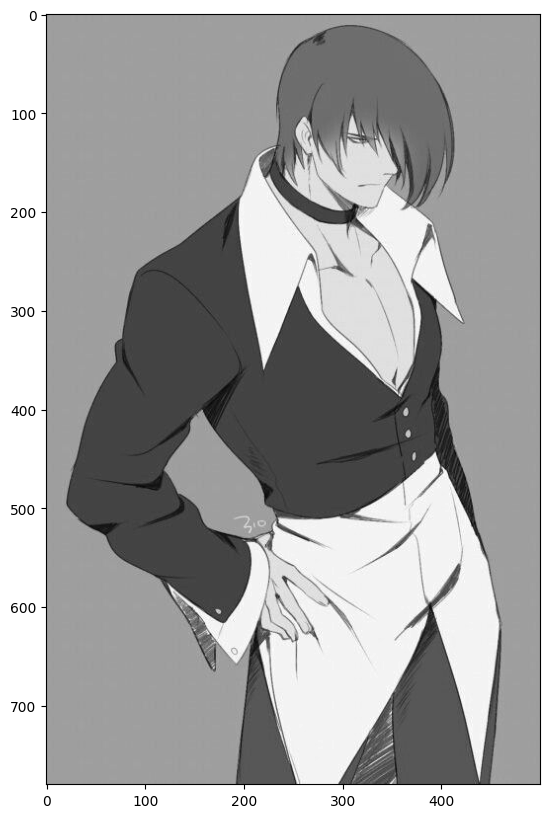

In [15]:
image = plt.imread('IoriYagami.jpg')
plt.figure(figsize=(10,10))
gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

In [17]:
class Dkmp:
  
  def __init__ (self, image, loK, hiK):
    self.image = image
    self.loK = loK
    self.hiK = hiK

  def filter(self, image, kernel):
    image = image
    HtoInt = int((kernel.shape[0] - 1)/2)
    WtoInt = int((kernel.shape[1] - 1)/2)
    PaddingKanan = kernel.shape[1]-WtoInt
    PaddingBawah = kernel.shape[0]-HtoInt
    result = np.zeros(image.shape)
    image = np.pad(image, ((WtoInt, PaddingKanan), (HtoInt, PaddingBawah)),mode='edge')
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            pixel = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    pixel += image[i+k, j+l] * kernel[k, l]
            result[i, j] = pixel
    return result
  
  def Proses(self):
    H = self.filter(self.image, self.hiK )
    L = self.filter(self.image, self.loK )
    HDS = H[ 0::2, :: ]
    LDS = L[ 0::2, :: ]
    HH = self.filter(HDS, np.transpose(self.hiK))
    HL = self.filter(HDS, np.transpose(self.loK))
    LH = self.filter(LDS, np.transpose(self.hiK))
    LL = self.filter(LDS, np.transpose(self.loK))
    self.HHDS = HH[::, ::2]
    self.HLDS = HL[::, ::2]
    self.LHDS = LH[::, ::2]
    self.LLDS = LL[::, ::2]

    
  def show(self):
    plt.figure(figsize=(10,10))
    plt.yticks = []
    plt.xticks = []
    plt.subplot(2,2,1)
    plt.title('H')
    plt.imshow(self.LLDS, cmap="gray")

    plt.subplot(2,2,3)
    plt.title('V')
    plt.imshow(self.LHDS, cmap="gray")

    plt.subplot(2,2,2)
    plt.title('D')
    plt.imshow(self.HLDS, cmap="gray")

    plt.subplot(2,2,4)
    plt.title('R')
    plt.imshow(self.HHDS, cmap="gray")

In [20]:
def gabungVerti(image,gray_image):
    hasil=np.zeros([image.shape[0]+gray_image.shape[0],image.shape[1]])
    for i in range(hasil.shape[0]):
        for j in range(hasil.shape[1]):
            if(i<image.shape[0]):
                hasil[i][j]=image[i][j]
            else:
                hasil[i][j]=gray_image[i-image.shape[0]][j]
    return hasil

In [21]:
def gabungHori(image,gray_image):
    hasil=np.zeros([image.shape[0],image.shape[1]+gray_image.shape[1]])
    for i in range(hasil.shape[0]):
        for j in range(hasil.shape[1]):
            if(j<image.shape[1]):
                hasil[i][j]=image[i][j]
            else:
                hasil[i][j]=gray_image[i][j-image.shape[1]]
    return hasil